In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [3]:
# Define neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),  # input layer (4) -> hidden layer (10)
    tf.keras.layers.Dense(3)  # hidden layer (10) -> output layer (3)
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
node_positions = {
    'input': [(0, i) for i in range(4)],
    'hidden': [(1, i) for i in range(10)],
    'output': [(2, i) for i in range(3)]
}

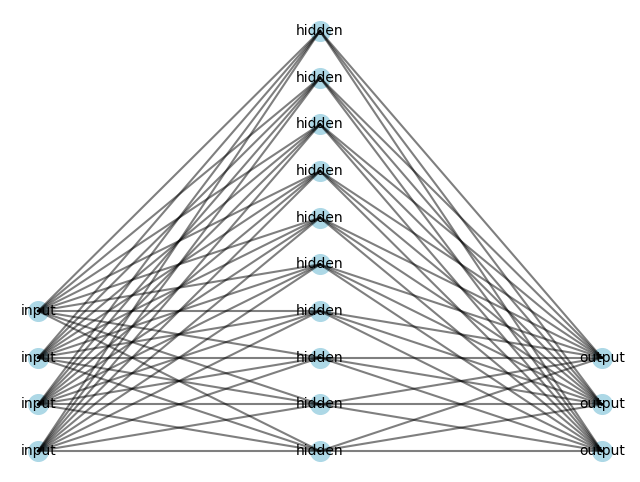

In [5]:
plt.figure(figsize=(8, 6))
for layer, positions in node_positions.items():
    for pos in positions:
        plt.scatter(pos[0], pos[1], s=200, c='lightblue')
        plt.annotate(layer, (pos[0], pos[1]), ha='center', va='center')

# Draw edges
for i in range(4):
    for j in range(10):
        plt.plot([0, 1], [i, j], 'k-', alpha=0.5)
for i in range(10):
    for j in range(3):
        plt.plot([1, 2], [i, j], 'k-', alpha=0.5)

plt.axis('off')
plt.show()

In [6]:
X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
output = model(X_tensor)

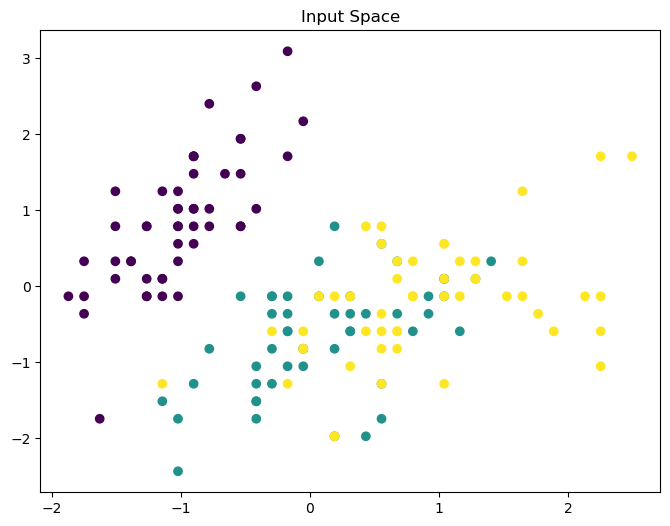

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Input Space')
plt.show()

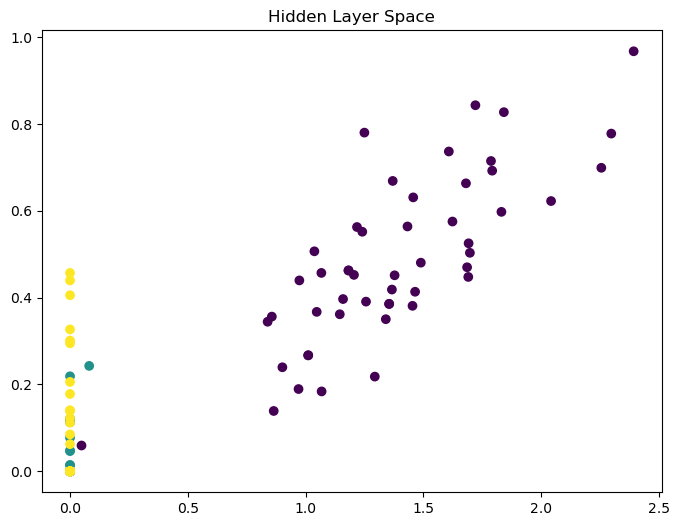

In [8]:
hidden_layer_output = tf.nn.relu(model.layers[0](X_tensor))
plt.figure(figsize=(8, 6))
plt.scatter(hidden_layer_output[:, 0].numpy(), hidden_layer_output[:, 1].numpy(), c=y)
plt.title('Hidden Layer Space')
plt.show()

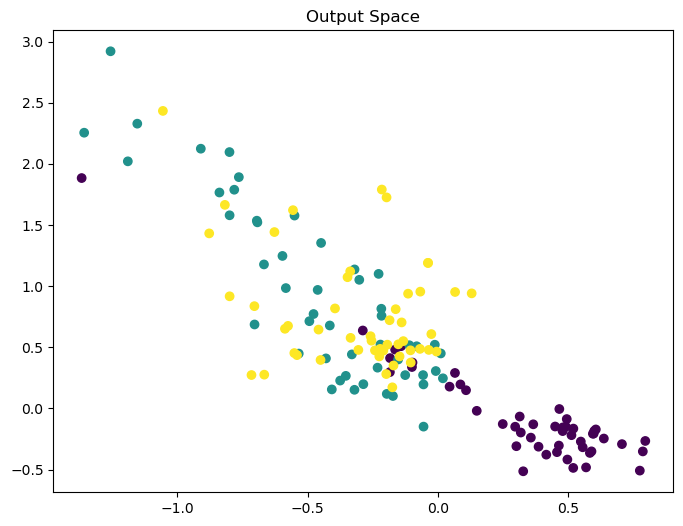

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(output[:, 0].numpy(), output[:, 1].numpy(), c=y)
plt.title('Output Space')
plt.show()

In [10]:
# Train model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)


In [11]:
# Evaluate model
loss, accuracy = model.evaluate(X, y)
print(f'Loss: {loss:.3f}, Accuracy: {accuracy:.3f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6870 - loss: 0.6892
Loss: 0.950, Accuracy: 0.487
